In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
#importing data file
recomd=pd.read_csv("ratings_Electronics.csv",names=['userId','productId','Rating','timestamp'])
recomd=pd.DataFrame(recomd)
recomd.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
#checking dataframe basic information
print(recomd.info())
print("\nShape of Data:",recomd.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
Rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None

Shape of Data: (7824482, 4)


In [4]:
#dropping timestamp as its of no use
recomd.drop(['timestamp'],inplace=True,axis=1)

In [5]:
#checking for blanks
recomd.isnull().sum()
#there are no blanks in data

userId       0
productId    0
Rating       0
dtype: int64

In [6]:
recomd.describe()

,Rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


# Data Exploration

In [7]:
#No of unique customers and products
print("Unique Customers: ",recomd.userId.nunique())
print("Unique Products: ",recomd.productId.nunique())

Unique Customers:  4201696
Unique Products:  476002


In [8]:
#Top users, rated good on average
data_user_rate=pd.DataFrame(recomd.groupby('userId')['Rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_user_rate.head(20)

,mean,count
userId,,
A5JLAU2ARJ0BO,3.861538,520
ADLVFFE4VBT8,4.283433,501
A3OXHLG6DIBRW8,4.451807,498
A6FIAB28IS79,4.183295,431
A680RUE1FDO8B,4.406404,406
A1ODOGXEYECQQ8,4.305263,380
A36K2N527TXXJN,4.525478,314
A2AY4YUOX2N1BQ,4.559486,311
AWPODHOB4GFWL,4.392857,308


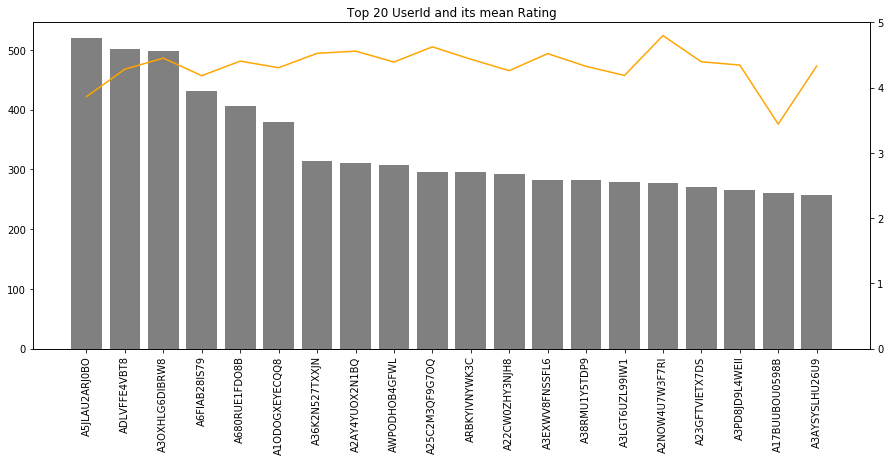

In [9]:
#Top 20 users basis no of ratings provided and average rating
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_user_rate.index,data_user_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_user_rate.index,data_user_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 UserId and its mean Rating")
plt.show()

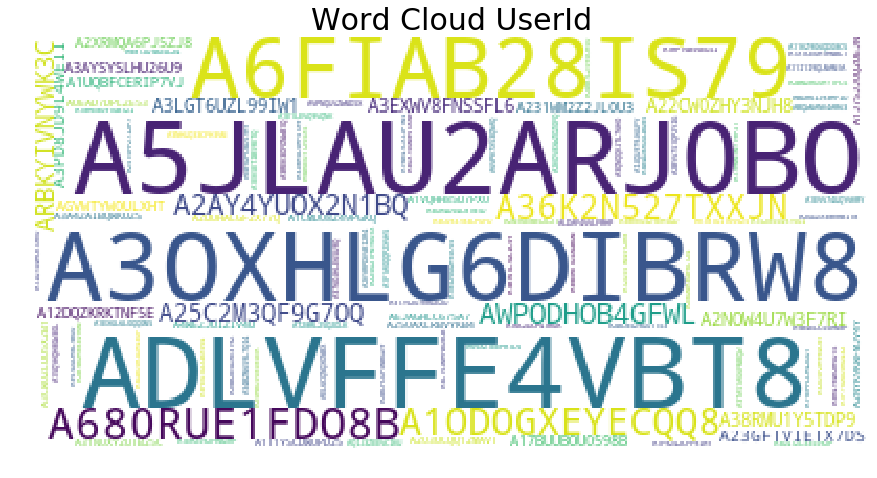

In [10]:
#Wrodcloud of UserId
from wordcloud import WordCloud
data_user_word=recomd.groupby('userId').size().sort_values(ascending=False)
data_user_word.index = data_user_word.index.map(str)
wordcloud = WordCloud(background_color='white',random_state=1).generate_from_frequencies(data_user_word)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud UserId",size=30)
plt.show()

In [11]:
#Top products bought have been rated as good on average 
data_prod_rate=pd.DataFrame(recomd.groupby('productId')['Rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_prod_rate.head(20)

,mean,count
productId,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226
B003ELYQGG,4.392528,11617
B003ES5ZUU,4.704749,10276
B007R5YDYA,4.690926,9907
B00622AG6S,4.420136,9823


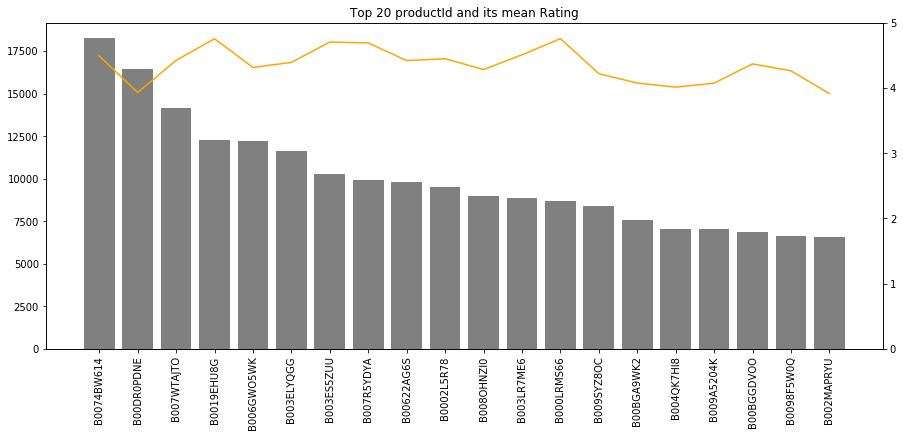

In [12]:
#Top 20 products basis no of ratings provided and average rating
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_prod_rate.index,data_prod_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_prod_rate.index,data_prod_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 productId and its mean Rating")
plt.show()

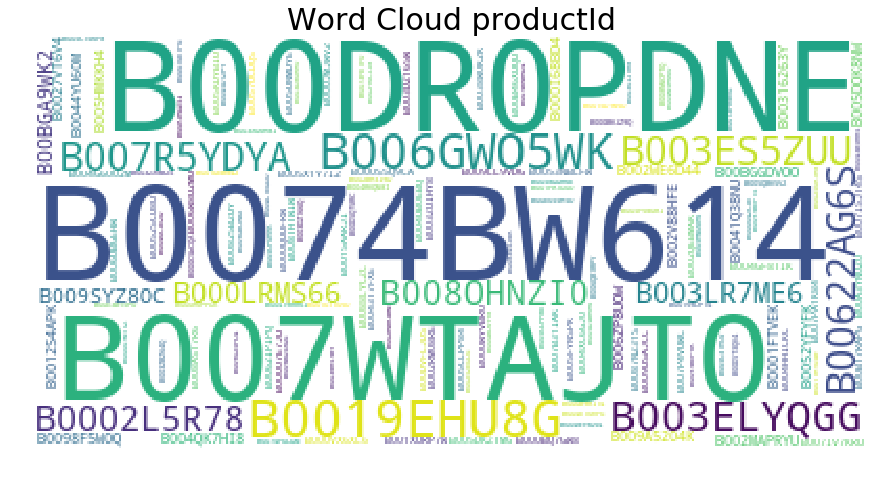

In [13]:
#Wrodcloud of productId
data_prod_word=recomd.groupby('productId').size().sort_values(ascending=False)
data_prod_word.index = data_prod_word.index.map(str)
wordcloud = WordCloud(background_color='white',random_state=2).generate_from_frequencies(data_prod_word)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud productId",size=30)
plt.show()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64


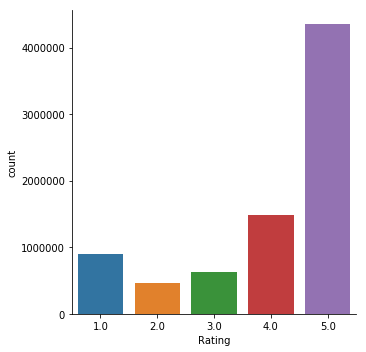

In [14]:
#Rating value_count, most ratings are either 4 or 5.
print(recomd.Rating.value_counts())
sns.catplot("Rating",data=recomd,kind='count')

In [15]:
#Mean of Rating
print("Mean of Rating:",np.mean(recomd.Rating))
#Median of Rating
print("Median of Rating:",np.median(recomd.Rating))

Mean of Rating: 4.012336791112817
Median of Rating: 5.0


# Subsetting of Data

In [16]:
data_flt=recomd.userId.value_counts()
#data_flt.to_csv(r'C:\Users\admin\Python Program\Great Lakes\Week 24 - Recommendation Asig\data_flt.csv')

In [17]:
data_flt[data_flt.values>=10].index.shape

(63175,)

In [18]:
data_final=recomd[recomd['userId'].isin(data_flt[data_flt>=50].index)]

In [19]:
data_final.shape

(125871, 3)

In [20]:
print("No of users giving rating for atleast 40 products:",(len(data_final)/len(recomd))*100)

No of users giving rating for atleast 40 products: 1.6086815715085037


5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Rating, dtype: int64


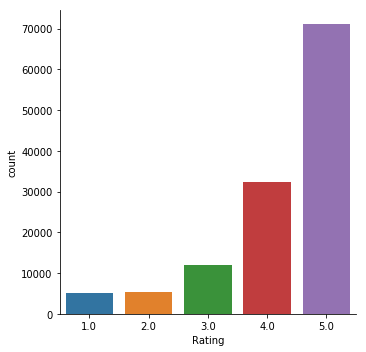

In [21]:
#Rating value_count
print(data_final.Rating.value_counts())
sns.catplot("Rating",data=data_final,kind='count')

In [22]:
#No of unique customers and products
print("Unique Customers: ",data_final.userId.nunique())
print("Unique Products: ",data_final.productId.nunique())

Unique Customers:  1540
Unique Products:  48190


In [23]:
data_flt_prod=data_final.productId.value_counts()
#for i in range(1,11):
#    print("No of respondents who rated",i,"products", data_flt_prod[data_flt_prod.values==i].count())

In [24]:
#Mean of Rating
print("Mean of Rating:",np.mean(data_final.Rating))
#Median of Rating
print("Median of Rating:",np.median(data_final.Rating))

Mean of Rating: 4.26133898991825
Median of Rating: 5.0


In [25]:
data_final_1=data_final[data_final['productId'].isin(data_flt_prod[data_flt_prod>=1].index)]

In [26]:
data_final_1.groupby('productId').size().sort_values(ascending=False)

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
B00834SJNA    110
B004T9RR6I    109
B002V88HFE    106
B0034CL2ZI    106
B00834SJSK    101
B002WE6D44    100
B00829TIA4     99
B004CLYEFK     97
B009SYZ8OC     95
B0079UAT0A     92
B0019EHU8G     90
B005CT56F8     87
B00DR0PDNE     84
B000QUUFRW     84
B00HFRWWAM     82
B005FYNSPK     81
B004CLYEE6     80
B0041Q38NU     79
B001TH7GUU     78
B00ARB5FLQ     78
             ... 
B004A8GTVW      1
B004A83WB2      1
B004A81PLG      1
B004A7NR8G      1
B004A8W29K      1
B004A7M462      1
B004A6W6LG      1
B004A4U886      1
B004A2RKB6      1
B004A21W2E      1
B0049ZDBLM      1
B004A8SSDE      1
B004A91H5Y      1
B004AF9GK6      1
B004AB7WBU      1
B004ADIITI      1
B004ADFV5W      1
B004AD2EW0      1
B004ACBYIQ      1
B004AC52UC      1
B004ABHKZ8      1
B004AB715W      1
B004A9DHMK      1
B004AB3GJM      1


In [27]:
data_final_1.head(10)

,userId,productId,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1003,A2Y4H3PXB07WQI,0972683275,4.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0


In [28]:
print("A user rated atleast 50 times and each product is rated atleast 5 times:"
      ,(len(data_final_1)/len(recomd))*100)

A user rated atleast 50 times and each product is rated atleast 5 times: 1.6086815715085037


In [29]:
#Mean of Rating
print("Mean of Rating:",np.mean(data_final_1.Rating))
#Median of Rating
print("Median of Rating:",np.median(data_final_1.Rating))

Mean of Rating: 4.26133898991825
Median of Rating: 5.0


5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Rating, dtype: int64


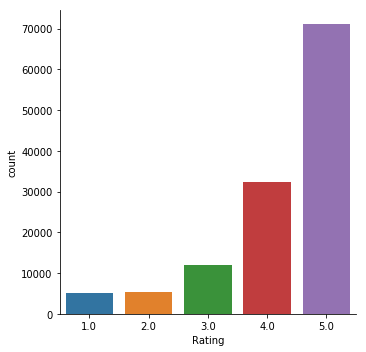

In [30]:
#Rating value_count
print(data_final_1.Rating.value_counts())
sns.catplot("Rating",data=data_final_1,kind='count')

### Final Data has - A user rated atleast 50 times

In [31]:
print(data_final_1.shape)
#data_final_1.to_csv(r'C:\Users\admin\Python Program\Great Lakes\Week 24 - Recommendation Asig\data_subset.csv')

(125871, 3)


In [32]:
#No of unique customers and products
print("Unique Customers: ",data_final_1.userId.nunique())
print("Unique Products: ",data_final_1.productId.nunique())

Unique Customers:  1540
Unique Products:  48190


In [33]:
#Filling products which are not rated zero and taking pivot to categorize each user with product they rated
final_ratings_matrix = pd.pivot_table(data_final_1,index='userId',columns='productId',values = 'Rating').fillna(0)

In [34]:
#Checking the density of rated products. User provided ratings to very less products or we can also say they didint bought 
#those products
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [35]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(data_final_1, test_size = 0.3, random_state=10)
train_data.head()

,userId,productId,Rating
7760154,A2JKM8KF3296CW,B00HPM1G8Q,5.0
4898726,A2MSBIA18RXYQC,B005F5II1I,2.0
2725558,AGYH5U11ZKPFB,B002MZUNXU,5.0
3600596,A6FIAB28IS79,B003VAHYXW,4.0
3084188,A3IJ4Z18FTIIP,B00365EVXI,1.0


In [37]:
print(train_data.shape)
print(test_data.shape)

(88109, 3)
(37762, 3)


In [38]:
#train_data.to_csv(r'C:\Users\admin\Python Program\Great Lakes\Week 24 - Recommendation Asig\train.csv')
#test_data.to_csv(r'C:\Users\admin\Python Program\Great Lakes\Week 24 - Recommendation Asig\test.csv')

# Popularity Based model

In [39]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId':'count','Rating':'mean'}).reset_index()
train_data_grouped.rename(columns={'userId':'count','Rating':'mean'},inplace=True)
train_data_grouped.head()

,productId,count,mean
0,0594451647,1,5.000000
1,0970407998,2,2.500000
2,0972683275,3,4.666667
3,1400501466,4,2.500000
4,1400501520,1,5.000000


In [40]:
#Sort the songs on recommendation score 
train_data_sort = train_data_grouped.sort_values(['count'], ascending = 0) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['count'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,count,mean,Rank
30874,B0088CJT4U,142,4.161972,1.0
19570,B003ES5ZUU,134,4.865672,2.0
30273,B007WTAJTO,126,4.714286,3.0
8700,B000N99BBC,117,4.786325,4.0
30561,B00829TIEK,104,4.423077,5.0


In [41]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [42]:
find_recom = [1267,385,40]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: ", i)
    print("The products are most sold along with there mean rating:\n")
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId:  1267
The products are most sold along with there mean rating:

       userId   productId  count      mean  Rank
30874    1267  B0088CJT4U    142  4.161972   1.0
19570    1267  B003ES5ZUU    134  4.865672   2.0
30273    1267  B007WTAJTO    126  4.714286   3.0
8700     1267  B000N99BBC    117  4.786325   4.0
30561    1267  B00829TIEK    104  4.423077   5.0


Here is the recommendation for the userId:  385
The products are most sold along with there mean rating:

       userId   productId  count      mean  Rank
30874     385  B0088CJT4U    142  4.161972   1.0
19570     385  B003ES5ZUU    134  4.865672   2.0
30273     385  B007WTAJTO    126  4.714286   3.0
8700      385  B000N99BBC    117  4.786325   4.0
30561     385  B00829TIEK    104  4.423077   5.0


Here is the recommendation for the userId:  40
The products are most sold along with there mean rating:

       userId   productId  count      mean  Rank
30874      40  B0088CJT4U    142  4.16197

#### Popularity based recommendation gives same recommendation to all. It ignores user preference or choices. It might be good for some new user who does not specify prefrences. But not much can be done in this. 
#### Trying new algo.

# Collaborative Filtering using SVD

In [43]:
train_final_ratings_matrix = pd.pivot_table(train_data,index='userId',columns='productId',values = 'Rating').fillna(0)
test_final_ratings_matrix = pd.pivot_table(test_data,index='userId',columns='productId',values = 'Rating').fillna(0)

In [44]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix['user_index'] = np.arange(0, train_final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix.head(10)

productId,0594451647,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L26YDA4,B00L3YHF6O,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
A10H24TDLK2VDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
A10NMELR4KX0J6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
A10O7THJ2O20AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [45]:
#Test Data
test_final_ratings_matrix['user_index'] = np.arange(0, test_final_ratings_matrix.shape[0], 1)
test_final_ratings_matrix.head()

productId,0594481813,0972683275,1400501466,1400532620,1400599997,1685560148,787988002X,8862936826,9043413585,9981719005,...,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [46]:
#Complete data
final_ratings_matrix.set_index(['user_index'], inplace=True)

#Train data
train_final_ratings_matrix.set_index(['user_index'], inplace=True)
train_final_ratings_matrix.head()

#Test Data
test_final_ratings_matrix.set_index(['user_index'], inplace=True)
test_final_ratings_matrix.head()

productId,0594481813,0972683275,1400501466,1400532620,1400599997,1685560148,787988002X,8862936826,9043413585,9981719005,...,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(train_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [48]:
train_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
train_preds_df = pd.DataFrame(train_predicted_ratings, columns = train_final_ratings_matrix.columns)
train_preds_df.head()

productId,0594451647,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8
0,0.002787,0.000665,0.006164,0.001849,0.001744,0.003467,0.001756,0.016918,0.001979,0.002764,...,0.157077,0.186878,0.247714,0.000542,0.035424,0.006837,0.047336,0.010869,0.084430,0.033627
1,0.003466,0.004717,0.011881,0.009499,0.000778,0.014058,0.001557,0.002743,0.000869,0.006707,...,-0.019847,-0.030477,0.052408,0.000744,-0.003913,0.001825,-0.037745,0.005260,-0.051896,-0.034465
2,-0.001885,0.000404,-0.001850,0.003561,-0.000205,0.001813,0.002568,0.002011,0.000115,0.001014,...,0.019079,0.039737,0.053842,-0.000504,0.009356,-0.001302,-0.009171,0.017816,0.023923,-0.007812
3,0.003197,0.000132,0.006293,0.002516,0.000794,0.003701,-0.000153,0.007644,0.000764,0.002560,...,-0.002794,-0.003553,0.025948,0.000729,0.000905,0.003978,0.002416,-0.002309,-0.015298,-0.000162
4,0.000220,0.000921,0.002396,0.003043,0.000441,0.003725,0.001455,0.002661,0.000670,0.001533,...,0.000568,0.023992,0.045647,0.000062,-0.002413,0.000711,-0.022767,0.008792,-0.014849,-0.019132


In [49]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [50]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 3
num_recommendations = 5
recommend_items(userID, train_final_ratings_matrix, train_preds_df, num_recommendations)


Below are the recommended items for user(user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          0.996925
B00829TIEK                  0.0          0.725458
B004CLYEFK                  0.0          0.697191
B008DWCRQW                  0.0          0.686776
B004CLYEDC                  0.0          0.650572


#### Evaluation of model

In [51]:
# Average ACTUAL rating for each item
test_final_ratings_matrix.mean().head()

productId
0594481813    0.001948
0972683275    0.003247
1400501466    0.006494
1400532620    0.000649
1400599997    0.006494
dtype: float64

In [52]:
# Singular Value Decomposition
U_t, sigma_t, Vt_t = svds(test_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma_t = np.diag(sigma_t)

In [53]:
test_predicted_ratings = np.dot(np.dot(U_t, sigma_t), Vt_t) 

# Predicted ratings
test_preds_df = pd.DataFrame(test_predicted_ratings, columns = test_final_ratings_matrix.columns)
test_preds_df.head()

productId,0594481813,0972683275,1400501466,1400532620,1400599997,1685560148,787988002X,8862936826,9043413585,9981719005,...,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.000214,0.003023,0.001432,0.000018,0.001083,0.000908,0.004880,0.001445,-0.000227,0.009623,...,0.023170,0.015195,0.013573,0.000385,0.007759,0.001282,0.001312,-0.006035,0.003226,0.006080
1,0.000658,0.009355,0.000723,0.000015,0.001138,0.004003,0.002689,0.000940,0.004630,-0.001446,...,-0.005350,-0.008250,0.003344,0.001120,0.001042,-0.000145,0.001659,-0.012335,0.004731,0.004711
2,0.001338,0.007677,0.001290,0.000014,0.004689,0.006041,0.013034,0.003392,0.015413,-0.017646,...,0.008786,-0.011135,0.033051,0.007712,0.005424,0.000810,0.003963,0.015873,0.022953,0.001377
3,0.000370,0.007898,0.000624,0.000002,0.000287,0.002968,-0.000159,0.000060,0.001299,-0.000930,...,-0.001330,-0.000644,-0.002372,-0.000066,0.000244,-0.000087,0.000776,-0.008719,-0.000548,0.005839
4,0.000215,0.003513,0.000898,-0.000004,0.002019,0.002602,0.003461,0.001011,0.002247,-0.005429,...,0.011268,-0.003334,0.010180,0.002045,0.004697,0.000053,0.001146,-0.011405,0.007696,0.002353


In [54]:
# Average PREDICTED rating for each item
test_preds_df.mean().head()

productId
0594481813    0.000540
0972683275    0.005699
1400501466    0.001069
1400532620    0.000021
1400599997    0.001617
dtype: float64

In [55]:
rmse_df = pd.concat([test_final_ratings_matrix.mean(), test_preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(21418, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594481813,0.001948,0.000540,0
0972683275,0.003247,0.005699,1
1400501466,0.006494,0.001069,2
1400532620,0.000649,0.000021,3
1400599997,0.006494,0.001617,4


In [56]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00366 



In [57]:
### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will 
### recommend 5 new products.

In [58]:
# Singular Value Decomposition
U, sigma, Vt = svds(final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [59]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(predicted_ratings, columns = final_ratings_matrix.columns)

In [60]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 1267
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1267):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.086446
B000N99BBC                  0.0          0.911772
B00829TIEK                  0.0          0.800758
B00829THK0                  0.0          0.705223
B002R5AM7C                  0.0          0.675636


In [61]:
userID = 385
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 385):

                   user_ratings  user_predictions
Recommended Items                                
B003ES5ZUU                  0.0          0.586356
B007WTAJTO                  0.0          0.508863
B002V88HFE                  0.0          0.345909
B001TH7GUU                  0.0          0.291679
B000QUUFRW                  0.0          0.253369


In [62]:
userID = 40
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 40):

                   user_ratings  user_predictions
Recommended Items                                
B003ES5ZUU                  0.0          0.562864
B007WTAJTO                  0.0          0.521629
B002V88HFE                  0.0          0.354552
B001TH7GUU                  0.0          0.291192
B000QUUFRW                  0.0          0.260331


Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of 
the user and it is not dependent on any additional information.

The number of products are quite large, so user has various options, however there are ceratin products which are sold quite often and can be easily recommended to a new user as they are best selling product.

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be 
not suitable to the user.You can see the differance above for the user id 1267,385 & 40. The Popularity based model has
recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different
list based on the user past purchase history